In [1]:
import osmnx as ox
import matplotlib.pyplot as plt
import geopandas as gp
import networkx as nx
import os.path
from os import path
import pathlib
import pandas as pd
import json
from points_in_polygons import if_point_inpolygon, if_points_in_polygonlist, count_points_in_polygonlist, if_points_in_polygon
ox.config(log_console=True, use_cache=True)
from shapely.geometry import Point, Polygon


import warnings

warnings.filterwarnings('ignore')

# Story Helper to calculate some deskriptive analysis for white spots

## None IsoChrones

In [2]:
df = gp.read_file("../results/berlin-inhabitants-improved.geojson")

In [3]:
# Get the centroid of the Polygon
poly_centroid = df.geometry[0].centroid

# Get the area of the Polygon
poly_area = df.geometry[0].area

# Get the bounds of the Polygon (i.e. bounding box)
poly_bbox = df.geometry[0].bounds

# Get the exterior of the Polygon
poly_ext = df.geometry[0].exterior

# Get the length of the exterior
poly_ext_length = df.geometry[0].length

In [4]:
#print("Poly centroid: ", poly_centroid)
#print("Poly Area: ", poly_area)
#print("Poly Bounding Box: ", poly_bbox)
#print("Poly Exterior: ", poly_ext)
#print("Poly Exterior Length: ", poly_ext_length)


In [5]:
plist = df.geometry[0:2].tolist()
plist

In [6]:
pointlist = [(13.08835, 52.41963), (13.08835, 52.41963)]

In [7]:
countliste = if_points_in_polygon(df.geometry[0],pointlist)

In [8]:
countliste

[True, True]

In [9]:
df

,plz,first_dig_plz,einwohner,area_m2,area_km2,einwohner_km2,einwohner_m2,geometry
0,14109,1,10049,2.522886e+07,25.228865,398.314,0.000398,"POLYGON ((13.08835 52.41963, 13.09584 52.42198..."
1,14089,1,17734,2.488821e+07,24.888210,712.546,0.000713,"POLYGON ((13.10929 52.45063, 13.10956 52.45108..."
2,13591,1,26762,8.988007e+06,8.988007,2977.523,0.002978,"POLYGON ((13.11738 52.51706, 13.11811 52.52010..."
3,13587,1,20108,1.747880e+07,17.478802,1150.422,0.001150,"POLYGON ((13.12796 52.58313, 13.12934 52.58593..."
4,13593,1,20238,4.561552e+06,4.561552,4436.647,0.004437,"POLYGON ((13.14288 52.52181, 13.14306 52.52179..."
...,...,...,...,...,...,...,...,...
193,12559,1,1,2.820620e+03,0.002821,354.532,0.000355,"POLYGON ((13.58139 52.44185, 13.58151 52.44239..."
194,12559,1,17643,3.761828e+07,37.618275,469.001,0.000469,"POLYGON ((13.58177 52.44236, 13.58248 52.44299..."
195,12627,1,35353,3.985389e+06,3.985389,8870.652,0.008871,"POLYGON ((13.59131 52.53367, 13.59148 52.53485..."
196,12587,1,17717,1.529608e+07,15.296081,1158.271,0.001158,"POLYGON ((13.59408 52.45418, 13.59430 52.45452..."


In [10]:
dfnew = df[df.plz == '14089']# & (df.plz == '13593')]#,'13595','13581','13591','13589','13587','12559','12527','12557'

#14089, 13593, 13595, 13581, 13591, 13589, 13587, 12559, 12527, 12557, 13159

In [11]:
dfnew = dfnew.append(df[df.plz == '13593'])
dfnew = dfnew.append(df[df.plz == '13595'])
dfnew = dfnew.append(df[df.plz == '13581'])
dfnew = dfnew.append(df[df.plz == '13591'])
dfnew = dfnew.append(df[df.plz == '13589'])
dfnew = dfnew.append(df[df.plz == '13587'])
dfnew = dfnew.append(df[df.plz == '12559'])
dfnew = dfnew.append(df[df.plz == '12527'])
dfnew = dfnew.append(df[df.plz == '12557'])
dfnew = dfnew.append(df[df.plz == '13159'])
dfnew

,plz,first_dig_plz,einwohner,area_m2,area_km2,einwohner_km2,einwohner_m2,geometry
1,14089,1,17734,2.488821e+07,24.888210,712.546,0.000713,"POLYGON ((13.10929 52.45063, 13.10956 52.45108..."
4,13593,1,20238,4.561552e+06,4.561552,4436.647,0.004437,"POLYGON ((13.14288 52.52181, 13.14306 52.52179..."
9,13595,1,19966,5.294865e+06,5.294865,3770.823,0.003771,"POLYGON ((13.17354 52.50851, 13.17399 52.50926..."
6,13581,1,14355,3.942352e+06,3.942352,3641.227,0.003641,"POLYGON ((13.15664 52.53667, 13.15679 52.53734..."
2,13591,1,26762,8.988007e+06,8.988007,2977.523,0.002978,"POLYGON ((13.11738 52.51706, 13.11811 52.52010..."
5,13589,1,21103,6.903208e+06,6.903208,3056.984,0.003057,"POLYGON ((13.14345 52.55039, 13.14350 52.55090..."
3,13587,1,20108,1.747880e+07,17.478802,1150.422,0.001150,"POLYGON ((13.12796 52.58313, 13.12934 52.58593..."
193,12559,1,1,2.820620e+03,0.002821,354.532,0.000355,"POLYGON ((13.58139 52.44185, 13.58151 52.44239..."
194,12559,1,17643,3.761828e+07,37.618275,469.001,0.000469,"POLYGON ((13.58177 52.44236, 13.58248 52.44299..."
186,12527,1,9425,2.620787e+07,26.207873,359.625,0.000360,"POLYGON ((13.55431 52.42579, 13.55542 52.42590..."


In [16]:
dfnew.to_file('../results/berlin-plz-whitespots.geojson',driver='GeoJSON')

In [17]:
# making boolean series for a team name 
#filter1 = df['plz'] == '14089'
#filter2 = df['plz'] == '13593'
  
# making boolean series for age 
#dfnew = df
  
# filtering data on basis of both filters 
#dfnew = df.where(filter1 & filter2)
#dfnew

In [18]:
#dfnew = df
#dfnew.set_index("plz", inplace=True)
#print(df.loc['13593'])

#op = df.loc[(df['plz'] == 13593)]
#print(op)

In [19]:
#dfnew

In [20]:
df_poly = gp.read_file("../results/berlin-plz-whitespots.geojson")

In [21]:
# Opening JSON file 
f = open('../results/isochrones-all-15.geojson',) 
  
# returns JSON object as  
# a dictionary 
data = json.load(f) 
  

In [22]:
#new = data['features'][6]

In [23]:
#new['geometry']['coordinates'][0]

In [24]:
#print(float(data['features'][0]['geometry']['coordinates'][0]))
#print(float(data['features'][0]['geometry']['coordinates'][1]))

In [25]:
#
#for i in range(len(data['features'])):
    #print(data['features'][i])
#    Point(float(data['features'][i]['geometry']['coordinates'][0]),float(data['features'][i]['geometry']['coordinates'][1]))
    #print(float(data['features'][i]['geometry']['coordinates'][0]))
    #print(float(data['features'][i]['geometry']['coordinates'][1]))

In [26]:
#df_points_helper = gp.read_file("../results/isochrones-drive-15.geojson",driver='GeoJSON')
df_points = gp.read_file("../results/isochrones-all-15.geojson",driver='GeoJSON')
df_points_helper = gp.read_file("../results/sample-points.geojson",driver='GeoJSON')
#df_points = pd.read_json("../results/isochrones-bus-15.geojson", orient='values')
#data = json.loads("../results/isochrones-bus-15.geojson")
df_points['geometry'] = df_points_helper['geometry']



In [27]:
len(df_points['geometry'])

10000

In [28]:
len(df_points_helper['geometry'])

10000

In [29]:
df_points

,max_spatial_distance_15min,mean_spatial_distance_15min,median_spatial_distance_15min,min_spatial_distance_15min,geometry
0,4127.491167,3522.822971,3506.772727,2858.656213,POINT (13.40766 52.39305)
1,3262.028274,2850.713788,2814.454337,2307.601951,POINT (13.29389 52.62069)
2,3462.946762,2944.289695,3035.600888,2369.720032,POINT (13.55983 52.39874)
3,5436.461779,4457.479723,4503.619726,3339.721516,POINT (13.32518 52.48467)
4,1371.635107,1147.815859,1192.101357,861.801493,POINT (13.46647 52.66642)
...,...,...,...,...,...
9995,4640.791243,3652.745672,3620.155120,2004.019855,POINT (13.26623 52.51403)
9996,6399.635543,5117.285188,4837.317981,3384.127667,POINT (13.33180 52.46694)
9997,8294.163576,5176.036634,4616.139931,3249.039818,POINT (13.59042 52.51521)
9998,4094.889279,3069.446486,3200.077663,1819.202288,POINT (13.39571 52.44361)


In [30]:
df_points

,max_spatial_distance_15min,mean_spatial_distance_15min,median_spatial_distance_15min,min_spatial_distance_15min,geometry
0,4127.491167,3522.822971,3506.772727,2858.656213,POINT (13.40766 52.39305)
1,3262.028274,2850.713788,2814.454337,2307.601951,POINT (13.29389 52.62069)
2,3462.946762,2944.289695,3035.600888,2369.720032,POINT (13.55983 52.39874)
3,5436.461779,4457.479723,4503.619726,3339.721516,POINT (13.32518 52.48467)
4,1371.635107,1147.815859,1192.101357,861.801493,POINT (13.46647 52.66642)
...,...,...,...,...,...
9995,4640.791243,3652.745672,3620.155120,2004.019855,POINT (13.26623 52.51403)
9996,6399.635543,5117.285188,4837.317981,3384.127667,POINT (13.33180 52.46694)
9997,8294.163576,5176.036634,4616.139931,3249.039818,POINT (13.59042 52.51521)
9998,4094.889279,3069.446486,3200.077663,1819.202288,POINT (13.39571 52.44361)


In [31]:
df_points['whitespot_plz'] = False
df_points

,max_spatial_distance_15min,mean_spatial_distance_15min,median_spatial_distance_15min,min_spatial_distance_15min,geometry,whitespot_plz
0,4127.491167,3522.822971,3506.772727,2858.656213,POINT (13.40766 52.39305),False
1,3262.028274,2850.713788,2814.454337,2307.601951,POINT (13.29389 52.62069),False
2,3462.946762,2944.289695,3035.600888,2369.720032,POINT (13.55983 52.39874),False
3,5436.461779,4457.479723,4503.619726,3339.721516,POINT (13.32518 52.48467),False
4,1371.635107,1147.815859,1192.101357,861.801493,POINT (13.46647 52.66642),False
...,...,...,...,...,...,...
9995,4640.791243,3652.745672,3620.155120,2004.019855,POINT (13.26623 52.51403),False
9996,6399.635543,5117.285188,4837.317981,3384.127667,POINT (13.33180 52.46694),False
9997,8294.163576,5176.036634,4616.139931,3249.039818,POINT (13.59042 52.51521),False
9998,4094.889279,3069.446486,3200.077663,1819.202288,POINT (13.39571 52.44361),False


In [35]:
if_point_inpolygon(df_poly.geometry[0], df_points.geometry[3])

False

## Function to calculate from the sum of the mean from isochrone analysis

In [88]:
import statistics

def add_mean_spatial_to_plz_whitespot(postal_poly,dataname):
    # drive
    df_points = gp.read_file("../results/isochrones-"+str(dataname)+"-15.geojson",driver='GeoJSON')
    df_points_helper = gp.read_file("../results/sample-points.geojson",driver='GeoJSON')
    #df_points = pd.read_json("../results/isochrones-bus-15.geojson", orient='values')
    #data = json.loads("../results/isochrones-bus-15.geojson")
    df_points['geometry'] = df_points_helper['geometry']
    
    postal_poly['mean_spatial_distance_15min'] = 0.0
    postal_poly['median_spatial_distance_15min']= 0.0
    postal_poly['max_spatial_distance_15min']= 0.0
    postal_poly['min_spatial_distance_15min']= 0.0
    postal_poly['q5_spatial_distance_15min']= 0.0
    postal_poly['q10_spatial_distance_15min']= 0.0
    postal_poly['q15_spatial_distance_15min']= 0.0
    postal_poly['q25_spatial_distance_15min']= 0.0
    postal_poly['q50_spatial_distance_15min']= 0.0
    postal_poly['q75_spatial_distance_15min']= 0.0
    postal_poly['q95_spatial_distance_15min']= 0.0
    postal_poly['q99_spatial_distance_15min']= 0.0
    measureY = pd.DataFrame()
    measureY['summe'] = 0.0
    #mean_count = []
    #print(postal_poly)
    for i in range(len(postal_poly)):
        mean_count = []
        measureX = []
        for j in range(len(df_points)):
            if if_point_inpolygon(postal_poly.geometry[i], df_points.geometry[j]):
                mean_count.append(df_points.mean_spatial_distance_15min[j])
                #print(mean_count)
        #measureY['summe'][i] = statistics.mean(mean_count)
        #measureY['summe'][i] = float(sum(mean_count))
        #measureX.append(sum(mean_count))
        #measureY.append(float(sum(mean_count)))
        #print(statistics.mean(measureX))
        #print(measureY)
        #print("TEST: "+str(sum(mean_count)+" -- COUNT i: "+str(i)))
        """
        postal_poly['mean_spatial_distance_15min'][i] = measure.mean()
        postal_poly['median_spatial_distance_15min'][i] = measure.median()
        postal_poly['max_spatial_distance_15min'][i] = measure.max()
        postal_poly['min_spatial_distance_15min'][i] = measure.min()
        postal_poly['q5_spatial_distance_15min'][i] = measure.quantile(q=0.05)
        postal_poly['q10_spatial_distance_15min'][i] = measure.quantile(q=0.1)
        postal_poly['q15_spatial_distance_15min'][i] = measure.quantile(q=0.15)
        postal_poly['q25_spatial_distance_15min'][i] = measure.quantile(q=0.25)
        postal_poly['q50_spatial_distance_15min'][i] = measure.quantile(q=0.50)
        postal_poly['q75_spatial_distance_15min'][i] = measure.quantile(q=0.75)
        postal_poly['q95_spatial_distance_15min'][i] = measure.quantile(q=0.95)
        postal_poly['q99_spatial_distance_15min'][i] = measure.quantile(q=0.99)
        """
        try:
            x = statistics.mean(mean_count)
            print(x)
        except:

        #y = statistics.median(mean_count)
        #print(y)
        """
        #print("TEST: "+str(sum(mean_count)+" -- COUNT i: "+str(i)))
        postal_poly['mean_spatial_distance_15min'][i] = measure.mean()
        postal_poly['median_spatial_distance_15min'][i] = measure.median()
        postal_poly['max_spatial_distance_15min'][i] = measure.max()
        postal_poly['min_spatial_distance_15min'][i] = measure.min()
        postal_poly['q5_spatial_distance_15min'][i] = measure.quantile(q=0.05)
        postal_poly['q10_spatial_distance_15min'][i] = measure.quantile(q=0.1)
        postal_poly['q15_spatial_distance_15min'][i] = measure.quantile(q=0.15)
        postal_poly['q25_spatial_distance_15min'][i] = measure.quantile(q=0.25)
        postal_poly['q50_spatial_distance_15min'][i] = measure.quantile(q=0.50)
        postal_poly['q75_spatial_distance_15min'][i] = measure.quantile(q=0.75)
        postal_poly['q95_spatial_distance_15min'][i] = measure.quantile(q=0.95)
        postal_poly['q99_spatial_distance_15min'][i] = measure.quantile(q=0.99)
        """
        
    postal_poly.to_file('../results/berlin-plz-whitespots-'+str(dataname)+'-analysis-15min.geojson',driver='GeoJSON')
    return measureY#, measureY         

In [89]:
datanames = ["all","drive","bike","bus","light_rail","subway","tram"]

for i in range(len(datanames)):
        dataframeY = add_mean_spatial_to_plz_whitespot(df_poly, datanames[i])
#type(measure)
#print(listencount)
dataframeY

2064.509019533359
2625.688545817315
3000.11987271902
3170.002543175485
2685.039541312087
2941.6826754774524
2736.2122939273586


StatisticsError: mean requires at least one data point

In [90]:
dataframeY = add_mean_spatial_to_plz_whitespot(df_poly, "drive")

13502.400085034806
13425.154908005135
13275.795019141287
13081.877491431227
13322.485334293575
13396.53864755146
13710.794407167234


StatisticsError: mean requires at least one data point

In [202]:
dataname = "drive"
df_test = gp.read_file('../results/berlin-plz-whitespots-'+str(dataname)+'-analysis-15min.geojson')
df_test

,plz,first_dig_plz,einwohner,area_m2,area_km2,einwohner_km2,einwohner_m2,mean_spatial_distance_15min,median_spatial_distance_15min,max_spatial_distance_15min,min_spatial_distance_15min,q5_spatial_distance_15min,q10_spatial_distance_15min,q15_spatial_distance_15min,q25_spatial_distance_15min,q50_spatial_distance_15min,q75_spatial_distance_15min,q95_spatial_distance_15min,q99_spatial_distance_15min,geometry
0,14089,1,17734,2.488821e+07,24.888210,712.546,0.000713,11466.823723,12104.840663,13511.893792,0.0,9039.922949,10713.858743,11060.242925,11425.880429,12104.840663,12412.171885,13229.674334,13383.602613,"POLYGON ((13.10929 52.45063, 13.10956 52.45108..."
1,13593,1,20238,4.561552e+06,4.561552,4436.647,0.004437,11466.823723,12104.840663,13511.893792,0.0,9039.922949,10713.858743,11060.242925,11425.880429,12104.840663,12412.171885,13229.674334,13383.602613,"POLYGON ((13.14288 52.52181, 13.14306 52.52179..."
2,13595,1,19966,5.294865e+06,5.294865,3770.823,0.003771,11466.823723,12104.840663,13511.893792,0.0,9039.922949,10713.858743,11060.242925,11425.880429,12104.840663,12412.171885,13229.674334,13383.602613,"POLYGON ((13.17354 52.50851, 13.17399 52.50926..."
3,13581,1,14355,3.942352e+06,3.942352,3641.227,0.003641,11466.823723,12104.840663,13511.893792,0.0,9039.922949,10713.858743,11060.242925,11425.880429,12104.840663,12412.171885,13229.674334,13383.602613,"POLYGON ((13.15664 52.53667, 13.15679 52.53734..."
4,13591,1,26762,8.988007e+06,8.988007,2977.523,0.002978,11466.823723,12104.840663,13511.893792,0.0,9039.922949,10713.858743,11060.242925,11425.880429,12104.840663,12412.171885,13229.674334,13383.602613,"POLYGON ((13.11738 52.51706, 13.11811 52.52010..."
5,13589,1,21103,6.903208e+06,6.903208,3056.984,0.003057,11466.823723,12104.840663,13511.893792,0.0,9039.922949,10713.858743,11060.242925,11425.880429,12104.840663,12412.171885,13229.674334,13383.602613,"POLYGON ((13.14345 52.55039, 13.14350 52.55090..."
6,13587,1,20108,1.747880e+07,17.478802,1150.422,0.001150,11466.823723,12104.840663,13511.893792,0.0,9039.922949,10713.858743,11060.242925,11425.880429,12104.840663,12412.171885,13229.674334,13383.602613,"POLYGON ((13.12796 52.58313, 13.12934 52.58593..."
7,12559,1,1,2.820620e+03,0.002821,354.532,0.000355,11466.823723,12104.840663,13511.893792,0.0,9039.922949,10713.858743,11060.242925,11425.880429,12104.840663,12412.171885,13229.674334,13383.602613,"POLYGON ((13.58139 52.44185, 13.58151 52.44239..."
8,12559,1,17643,3.761828e+07,37.618275,469.001,0.000469,11466.823723,12104.840663,13511.893792,0.0,9039.922949,10713.858743,11060.242925,11425.880429,12104.840663,12412.171885,13229.674334,13383.602613,"POLYGON ((13.58177 52.44236, 13.58248 52.44299..."
9,12527,1,9425,2.620787e+07,26.207873,359.625,0.000360,11466.823723,12104.840663,13511.893792,0.0,9039.922949,10713.858743,11060.242925,11425.880429,12104.840663,12412.171885,13229.674334,13383.602613,"POLYGON ((13.55431 52.42579, 13.55542 52.42590..."


In [193]:
print(measure.median())
print(measure.mean())
print(measure.max())
print(measure.min())
print(measure.quantile(q=0.05))
print(measure.quantile(q=0.1))
print(measure.quantile(q=0.15))
print(measure.quantile(q=0.25))
print(measure.quantile(q=0.5))
print(measure.quantile(q=0.75))
print(measure.quantile(q=0.95))
print(measure.quantile(q=0.99))

0    12140.573855
dtype: float64
0    11676.908536
dtype: float64
0    15556.950175
dtype: float64
0    0.0
dtype: float64
0    8181.585127
Name: 0.05, dtype: float64
0    8759.823513
Name: 0.1, dtype: float64
0    9321.696234
Name: 0.15, dtype: float64
0    10884.648888
Name: 0.25, dtype: float64
0    12140.573855
Name: 0.5, dtype: float64
0    12972.198971
Name: 0.75, dtype: float64
0    14128.580993
Name: 0.95, dtype: float64
0    14736.978385
Name: 0.99, dtype: float64


In [191]:
print(measure.describe())

dataframe = measure.describe()
dataframe

                  0
count    973.000000
mean   11676.908536
std     2002.928419
min        0.000000
25%    10884.648888
50%    12140.573855
75%    12972.198971
max    15556.950175


,0
count,973.000000
mean,11676.908536
std,2002.928419
min,0.000000
25%,10884.648888
50%,12140.573855
75%,12972.198971
max,15556.950175


In [157]:
df_test = gp.read_file('../results/isochrones-drive-15.geojson')

In [158]:
#df_test = gp.read_file('../results/isochrones-tram-15.geojson')

In [159]:
#df_test = gp.read_file('../results/isochrones-bus-15.geojson')

In [160]:
len(df_test)

9675

In [161]:
df_test.describe()

,mean_spatial_distance_15min
count,9675.000000
mean,13449.167885
std,2294.268411
min,0.000000
25%,12211.883459
50%,13526.241777
75%,14790.617048
max,20494.205390


In [162]:
print(df_test.quantile(q=0.004))

mean_spatial_distance_15min    628.290716
Name: 0.004, dtype: float64


In [163]:
tail50 = df_test.sort_values(by='mean_spatial_distance_15min', ascending=True).head(80)

In [168]:
tail50

,mean_spatial_distance_15min,geometry
1776,0.000000,POINT (13.44261 52.55878)
5023,0.000000,POINT (13.42290 52.44884)
2755,0.000000,POINT (13.38507 52.61215)
9311,0.000000,POINT (13.38398 52.61551)
7200,0.000000,POINT (13.52323 52.52084)
...,...,...
1073,6793.765289,POINT (13.12961 52.58412)
7706,7032.276179,POINT (13.40977 52.43086)
9207,7075.449547,POINT (13.12083 52.44403)
4063,7168.518135,POINT (13.12145 52.44252)


<AxesSubplot:>

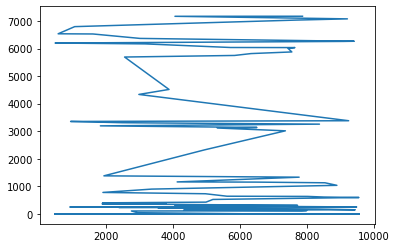

In [165]:
tail50_drive['mean_spatial_distance_15min'].plot()

In [176]:
plt.rcParams['figure.figsize'] = [16, 11]

In [177]:
tail = pd.DataFrame(tail50_drive['mean_spatial_distance_15min'].tolist())

<AxesSubplot:>

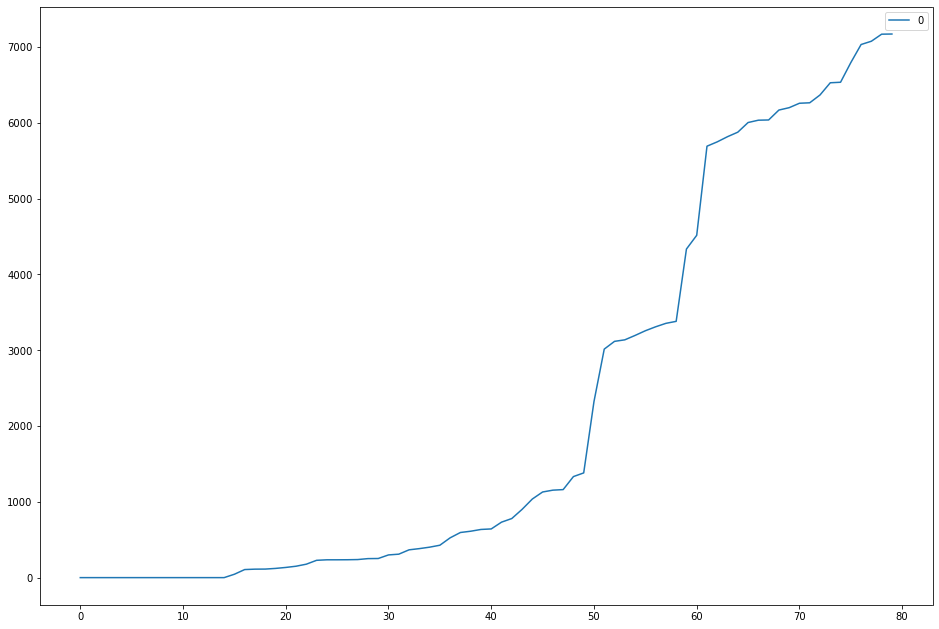

In [178]:
tail.plot()

<AxesSubplot:>

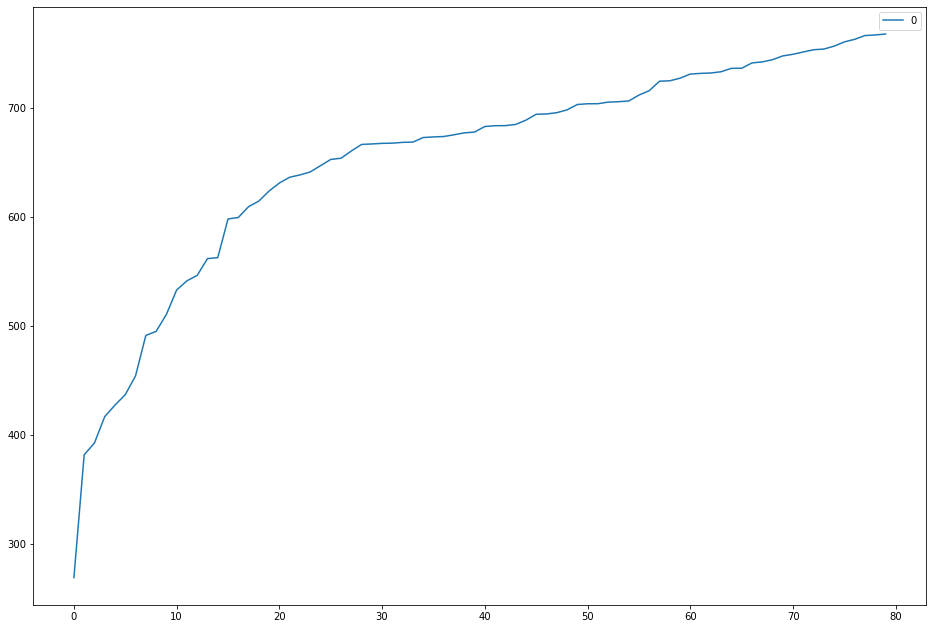

In [179]:
df_test = gp.read_file('../results/isochrones-tram-15.geojson')
tail50 = df_test.sort_values(by='mean_spatial_distance_15min', ascending=True).head(80)
tail = pd.DataFrame(tail50['mean_spatial_distance_15min'].tolist())
tail.plot()

<AxesSubplot:>

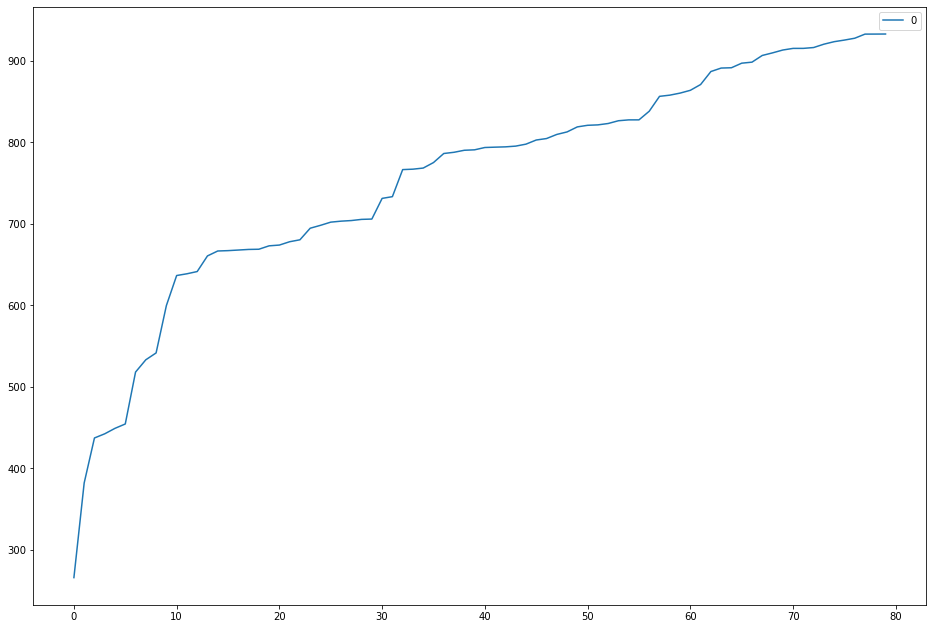

In [180]:
df_test = gp.read_file('../results/isochrones-bus-15.geojson')
tail50 = df_test.sort_values(by='mean_spatial_distance_15min', ascending=True).head(80)
tail = pd.DataFrame(tail50['mean_spatial_distance_15min'].tolist())
tail.plot()

<AxesSubplot:>

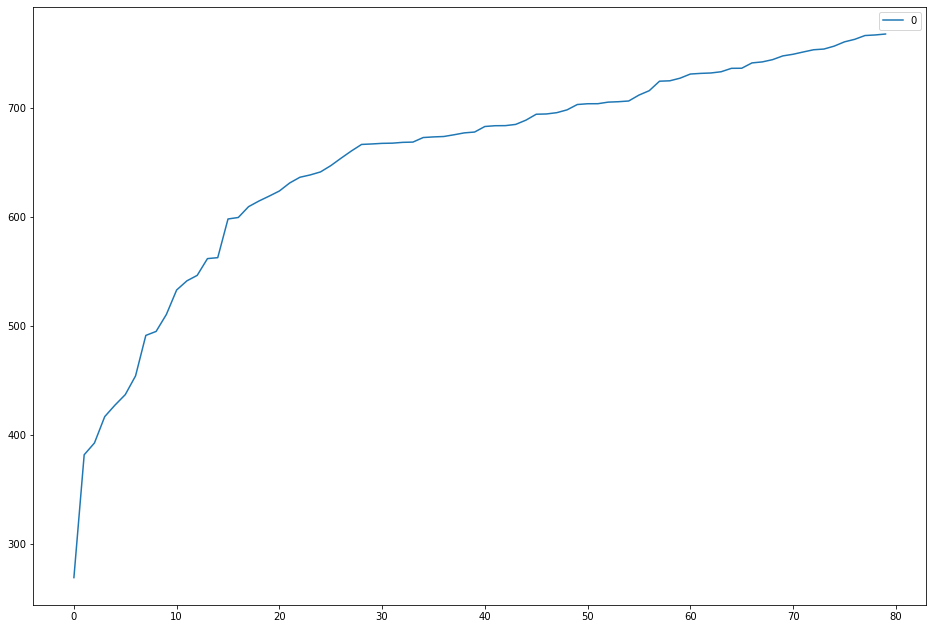

In [181]:
df_test = gp.read_file('../results/isochrones-subway-15.geojson')
tail50 = df_test.sort_values(by='mean_spatial_distance_15min', ascending=True).head(80)
tail = pd.DataFrame(tail50['mean_spatial_distance_15min'].tolist())
tail.plot()

<AxesSubplot:>

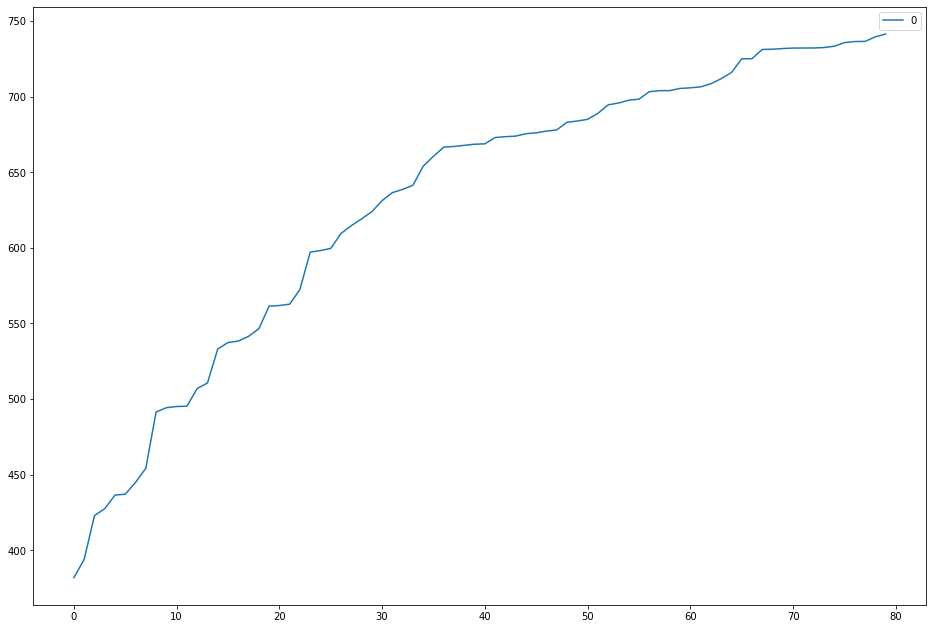

In [182]:
df_test = gp.read_file('../results/isochrones-light_rail-15.geojson')
tail50 = df_test.sort_values(by='mean_spatial_distance_15min', ascending=True).head(80)
tail = pd.DataFrame(tail50['mean_spatial_distance_15min'].tolist())
tail.plot()

<AxesSubplot:>

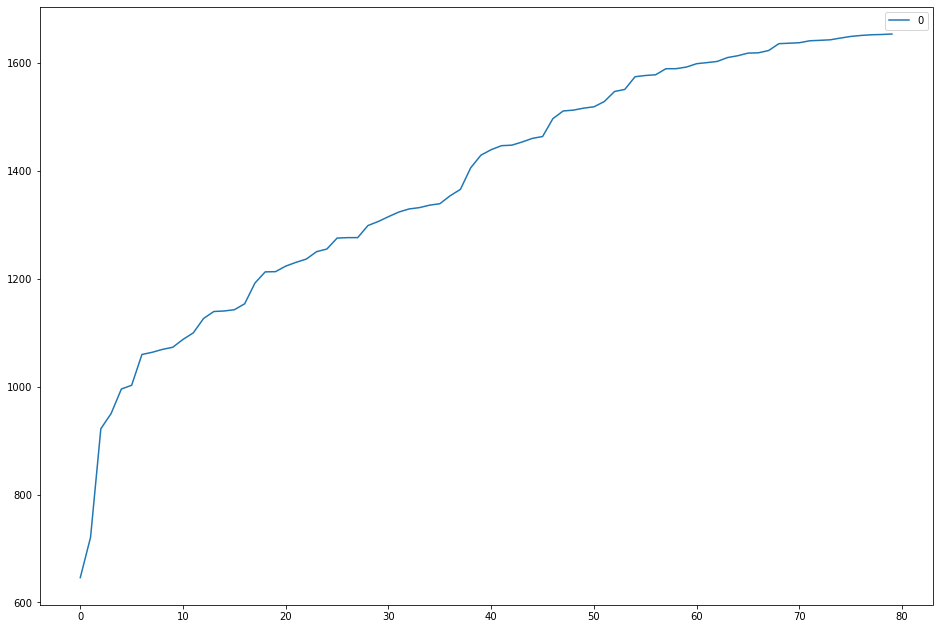

In [183]:
df_test = gp.read_file('../results/isochrones-bike-15.geojson')
tail50 = df_test.sort_values(by='mean_spatial_distance_15min', ascending=True).head(80)
tail = pd.DataFrame(tail50['mean_spatial_distance_15min'].tolist())
tail.plot()

<AxesSubplot:>

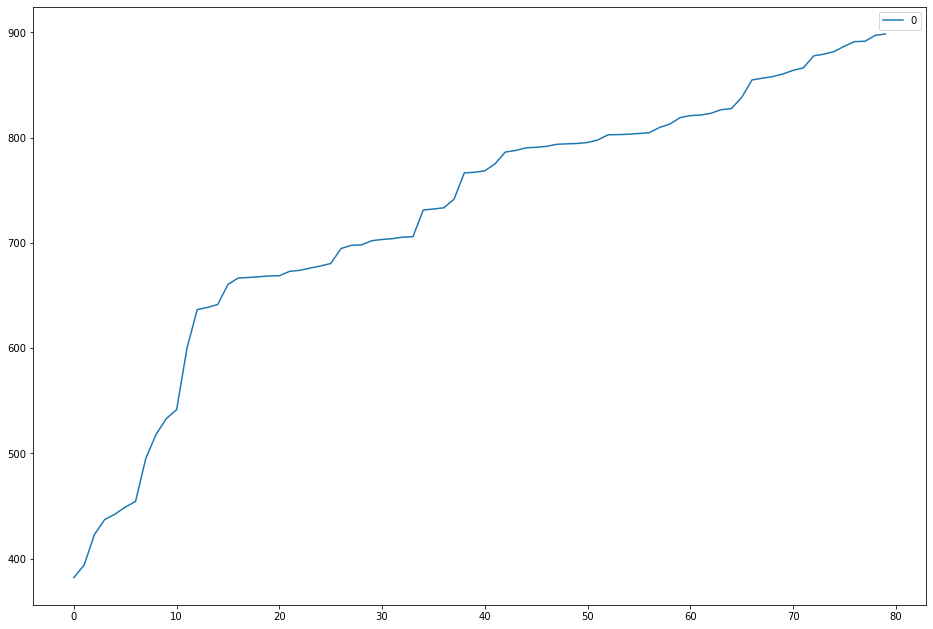

In [184]:
df_test = gp.read_file('../results/isochrones-all-15.geojson')
tail50 = df_test.sort_values(by='mean_spatial_distance_15min', ascending=True).head(80)
tail = pd.DataFrame(tail50['mean_spatial_distance_15min'].tolist())
tail.plot()

In [188]:
df_points = gp.read_file("../results/isochrones-bus-15.geojson",driver='GeoJSON')

In [189]:
df_points['mean_spatial_distance_15min'].median()

3104.1437350543233

In [243]:
df = gp.read_file("../results/berlin-inhabitants-improved.geojson")
dfnew = df[df.plz == '13627'] #13159, 14129,14019
#dfnew = df[df.plz == '13159'] #13159, 14129,14019
#dfnew = df[df.plz == '14129'] #13159, 14129,14019
#dfnew = df[df.plz == '14019'] #13159, 14129,14019

In [244]:
def calculate_mean_for_plz(poly,df_points):
    counter = 0
    count = 0.0
    for i in range(len(df_points)):
        if if_point_inpolygon(poly, df_points.geometry[i]):
            counter = counter + 1
            count = count + float(df_points['mean_spatial_distance_15min'][i])
    return float(count/counter)

In [245]:
dfnew['geometry'][:]

29    POLYGON ((13.27259 52.53880, 13.27278 52.53927...
Name: geometry, dtype: geometry

In [246]:
polytest = dfnew['geometry'][29]

In [247]:
type(polytest)

shapely.geometry.polygon.Polygon

In [248]:
df_points_helper = gp.read_file("../results/sample-points.geojson",driver='GeoJSON')
#df_points = pd.read_json("../results/isochrones-bus-15.geojson", orient='values')
#data = json.loads("../results/isochrones-bus-15.geojson")
df_points['geometry'] = df_points_helper['geometry']

In [249]:
calculate_mean_for_plz(polytest, df_points)

3267.9808154533507

In [250]:
df_points['mean_spatial_distance_15min'].min()

265.7460923337877

In [253]:
df_points['mean_spatial_distance_15min'].max()

4079.301643516218

In [251]:
def calculate_mean_for_plz(poly,df_points):
    counter = 0
    count = 0.0
    for i in range(len(df_points)):
        if if_point_inpolygon(poly, df_points.geometry[i]):
            counter = counter + 1
            count = count + float(df_points['min_spatial_distance_15min'][i])
    return float(count/counter)

In [252]:
calculate_mean_for_plz(polytest, df_points)

2582.699192368661